In [ ]:
# Q-7: Do winter driving conditions lead to more multi-car collisions?
# * Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in January than in May.
from NYPD_functions import (dataFram3NYC, focusDataframer,
                            dateFilterMyDataFrame, addMonthFilterByYearMyDF,
                            monthNamesLister)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

In [44]:
questionSevenCol_list = [column_number for column_number in range(24, 29)]
questionSevenCol_list.append(0)

def monthlyFilterMyDataFrame(
        focus_df=focusDataframer(questionSevenCol_list)
        ):
    """
    REQUIRES A DATAFRAME, COLUMN NAME THAT HAS DATE OF EACH RECORD, 
    ADDS A COLUMN BY NAME 'ye4r' WITH FOUR DIGIT YEAR 'YYYY' STRING AS VALUES
    """
    pass
    print()
    print('> > > monthlyFilterMyDataFrame() filtering all records by year : ')
    #     focus_df = focusDataframer()
    focus_df['ye4r'] = [date[-4:] for date in focus_df['DATE']]
    focus_df['m0nth'] = [
        date[:2] for date in focus_df['DATE']
    ]
    return focus_df.drop(columns=['DATE'])


> > > > dataFram3NYC() now reading csv with file path below
> > >  C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_a

In [47]:
def monthNamesLister(months_in_numbers_list=np.arange(12)):
    """ RETURNS LIST OF FULL NAMES OF MONTHS GIVEN AS 01 OR 02 OR 03 ETC"""
    monthNames_list = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December'
    ]
    monthsNumber_list = np.arange(12)
    monthNames_dict = dict(zip(monthsNumber_list, monthNames_list))
    out_list = [
        monthNames_dict[integerMonth]
        for integerMonth in list(months_in_numbers_list)
    ]
    return out_list

In [71]:
def finalDataFram3r(focusAddMonth_df=monthlyFilterMyDataFrame()):
    gr0uped_df = focusAddMonth_df.groupby(['m0nth', 'ye4r']).count()
    collusionTotal2017_num = focusAddMonth_df.count()[-1]
    vehicleColumns_list = list(gr0uped_df.columns)
    gr0uped_df['singleCarOnly'] = [
        int(first - second)
        for first, second in zip(gr0uped_df[vehicleColumns_list[0]],
                                 gr0uped_df[vehicleColumns_list[1]])
    ]
    gr0uped_df['twoCarsOnly'] = [
        int(first - second)
        for first, second in zip(gr0uped_df[vehicleColumns_list[1]],
                                 gr0uped_df[vehicleColumns_list[2]])
    ]
    # at least one vehicle involved
    gr0uped_df['numTotalMonthly'] = [
        int(minimum_one_car)
        for minimum_one_car in gr0uped_df[vehicleColumns_list[0]]
    ]
    final_df = gr0uped_df[[
        'singleCarOnly', 'twoCarsOnly', 'numTotalMonthly'
    ]]
    final_df['threeCarsAndMore'] = [
        int(total) - int(single + double) for total, single, double in zip(
            final_df['numTotalMonthly'], final_df['singleCarOnly'],
            final_df['twoCarsOnly'])
    ]
    return final_df.drop(columns=['singleCarOnly', 'twoCarsOnly'])


> > > monthlyFilterMyDataFrame() filtering all records by year : 


In [125]:
def finalPivotDataFramer(monthYearIndexed_df=finalDataFram3r()):
    pass
    monthYearIndexed_df['percMonthly'] = [
        float(threecars / totalnum * 100).__round__(2)
        for threecars, totalnum in 
        zip(monthYearIndexed_df['threeCarsAndMore'],
                                       monthYearIndexed_df['numTotalMonthly'])
    ]
    monthName_list = list(monthNamesLister())
    finalPivot_df = monthYearIndexed_df.reset_index().pivot(index = 'ye4r',
                                                           columns = 'm0nth',
                                                           values = 'percMonthly')

    return finalPivot_df['2013':'2018']

In [126]:
finalPivotDataFramer()
# monthNamesLister()

m0nth,01,02,03,04,05,06,07,08,09,10,11,12
ye4r,,,,,,,,,,,,
2013,7.06,6.63,6.86,6.67,6.72,6.78,7.15,6.85,6.69,6.95,6.71,6.73
2014,6.31,5.62,6.14,6.24,6.50,6.38,6.53,6.64,6.24,6.42,6.39,6.59
2015,7.29,6.24,6.13,6.68,6.74,6.38,6.80,7.01,6.47,6.46,6.77,6.01
2016,6.21,6.12,7.51,8.49,7.84,7.84,19.57,82.37,30.80,11.50,11.40,11.79
2017,35.65,6.52,4.78,5.36,5.43,5.43,5.54,5.55,5.89,5.80,6.02,6.06
2018,5.80,5.72,5.44,5.86,6.22,6.08,6.41,5.94,6.67,6.05,5.96,5.99


In [168]:
def multiCarInvMonthlySerier(
    df = finalPivotDataFramer().T
):
    """
    CREATES A BUBBLE CHART WITH BUBBLE SIZE PROPORTIONATE TO MONTHLY COLLUSION COUNT
    """
    plt.figure(figsize=(18, 13))
    plt.title('BUBBLE CHART: ZIP CODE VS COLLUSION-PER-SQ-KM-ALL-YEARS')
    plt.title('NYC Collusion Dataset-MONTHLY-MULTI-CAR-INVOLVEMENT-ALL-YEARS')
    plt.ylabel('Monthly Three or More Vehicle Involvement Percentage')
    plt.xlabel('Months')
    m0nthFancy_l1st = monthNamesLister()
    monthFancy_list = [month for month in m0nthFancy_l1st]
    
    for year in df.columns:
        plt.plot(
            df.index,
            df[year],
            marker='o',
            markersize=10,
            lw = 1.5,
            alpha=0.50,
            label=year)
    plt.legend(loc='best')
    fileName2save = 'Q7_MULTI-CAR-COLLUSION-MONTHLY-ALL-YEARS.png'
    plt.savefig(fileName2save)
    plt.xticks(rotation=45)
    plt.show()
    return None

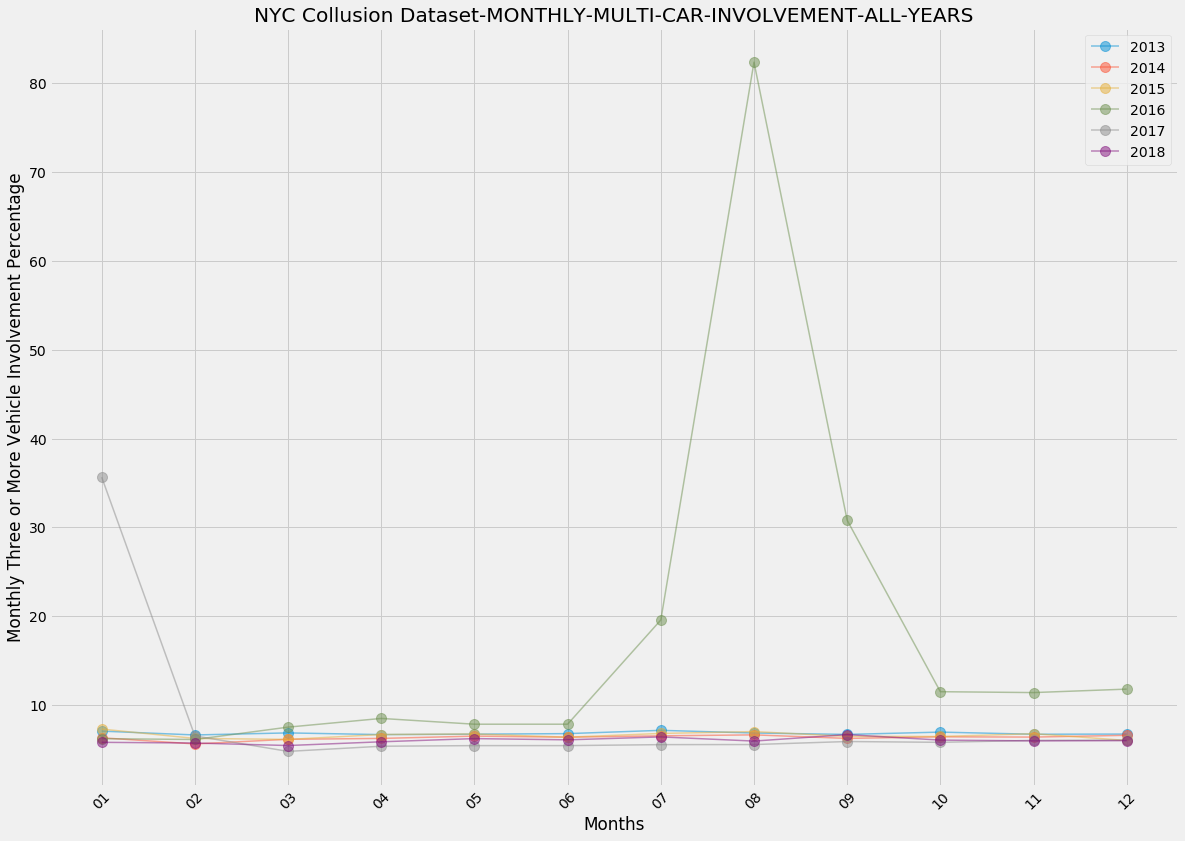

In [169]:
multiCarInvMonthlySerier()

In [63]:
def fin4lPerctgDataFramer(final_df=finalDataFram3r(),
                          focusAddMonth_df=monthlyFilterMyDataFrame()):
    pass
    percentage_df = final_df.copy()
    percentage_df['percMonthly'] = [
        float(threecars / totalnum * 100).__round__(2)
        for threecars, totalnum in zip(percentage_df['threeCarsAndMore'],
                                       percentage_df['numTotalMonthly'])
    ]
    return percentage_df.drop(columns='threeCarsAndMore')


> > > monthlyFilterMyDataFrame() filtering all records by year : 


In [120]:
 fin4lPerctgDataFramer()

,numTotalMonthly,percMonthly
m0nth,,
01,118601,10.69
02,109333,6.15
03,125024,6.12
04,120351,6.56
05,117734,6.56
06,117964,6.47
07,129734,8.56
08,128107,18.16
09,127769,10.13


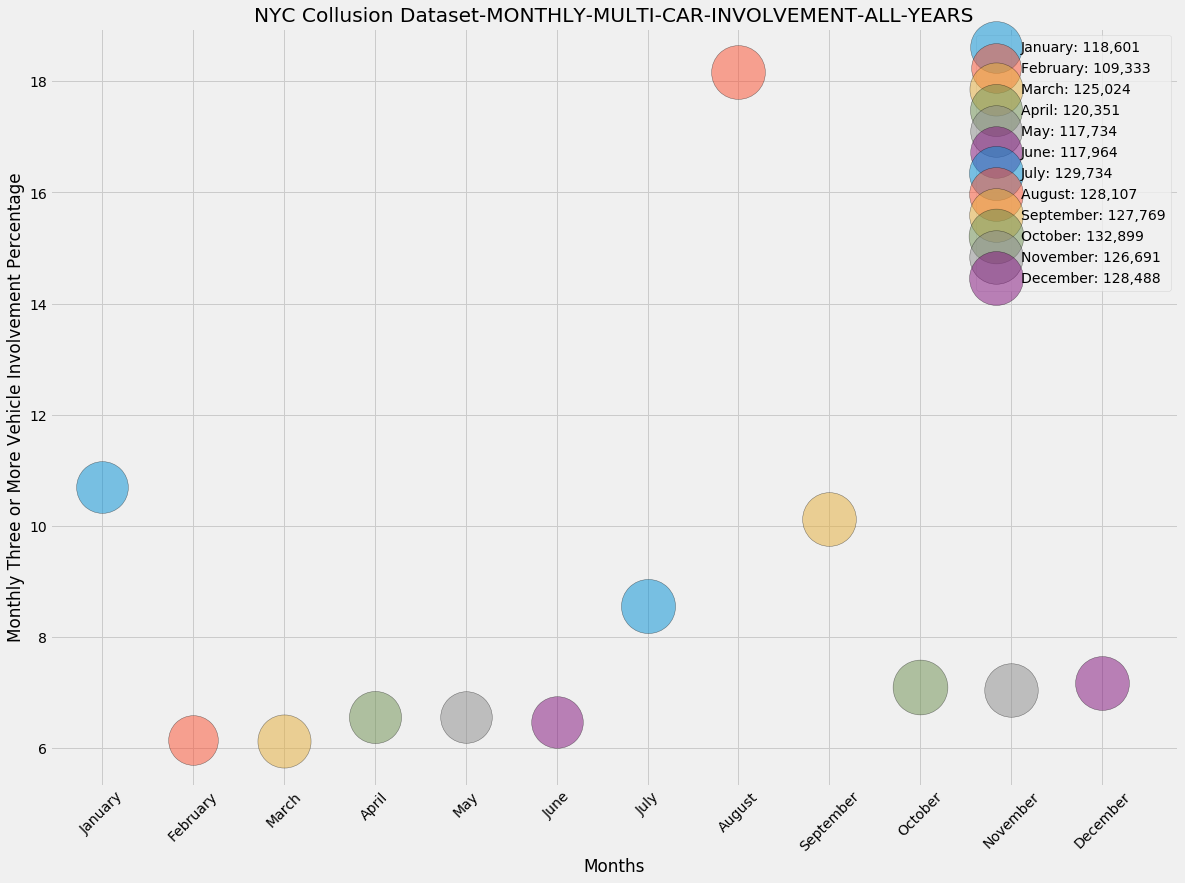

In [81]:
def bubbleMultiCarInv(multiCarInvPerc_df=fin4lPerctgDataFramer()):
    """
    CREATES A BUBBLE CHART WITH BUBBLE SIZE PROPORTIONATE TO MONTHLY COLLUSION COUNT
    """
    plt.figure(figsize=(18, 13))
    plt.title('BUBBLE CHART: ZIP CODE VS COLLUSION-PER-SQ-KM-ALL-YEARS')
    plt.title('NYC Collusion Dataset-MONTHLY-MULTI-CAR-INVOLVEMENT-ALL-YEARS')
    plt.ylabel('Monthly Three or More Vehicle Involvement Percentage')
    plt.xlabel('Months')
    perc_list = multiCarInvPerc_df['percMonthly']
    num4size_list = multiCarInvPerc_df['numTotalMonthly']
    m0nthFancy_l1st = monthNamesLister()
    monthFancy_list = [
        month + ': {:,}'.format(numCollusion)
        for month, numCollusion in zip(m0nthFancy_l1st, num4size_list)
    ]

    for month, percentage, numTotal in zip(m0nthFancy_l1st, perc_list,
                                           num4size_list):
        lab3l = str(month)+': {:,}'.format(numTotal)
        plt.scatter(
            month,
            percentage,
            s=3000 * numTotal / num4size_list.max(),
            marker='o',
            edgecolors='black',
            alpha=0.50,
            label=lab3l)
    plt.legend(loc='best')
    fileName2save = 'Q7_MULTI-CAR-COLLUSION-MONTHLY-ALL-YEARS.png'
    plt.savefig(fileName2save)
    plt.xticks(rotation=45)
    plt.show()
    return None

bubbleMultiCarInv()



# Q-7: Do winter driving conditions lead to more multi-car collisions?
# * Calculate the chi-square test statistic for testing whether a
# collision is more likely to involve 3 or more cars in January than in May.

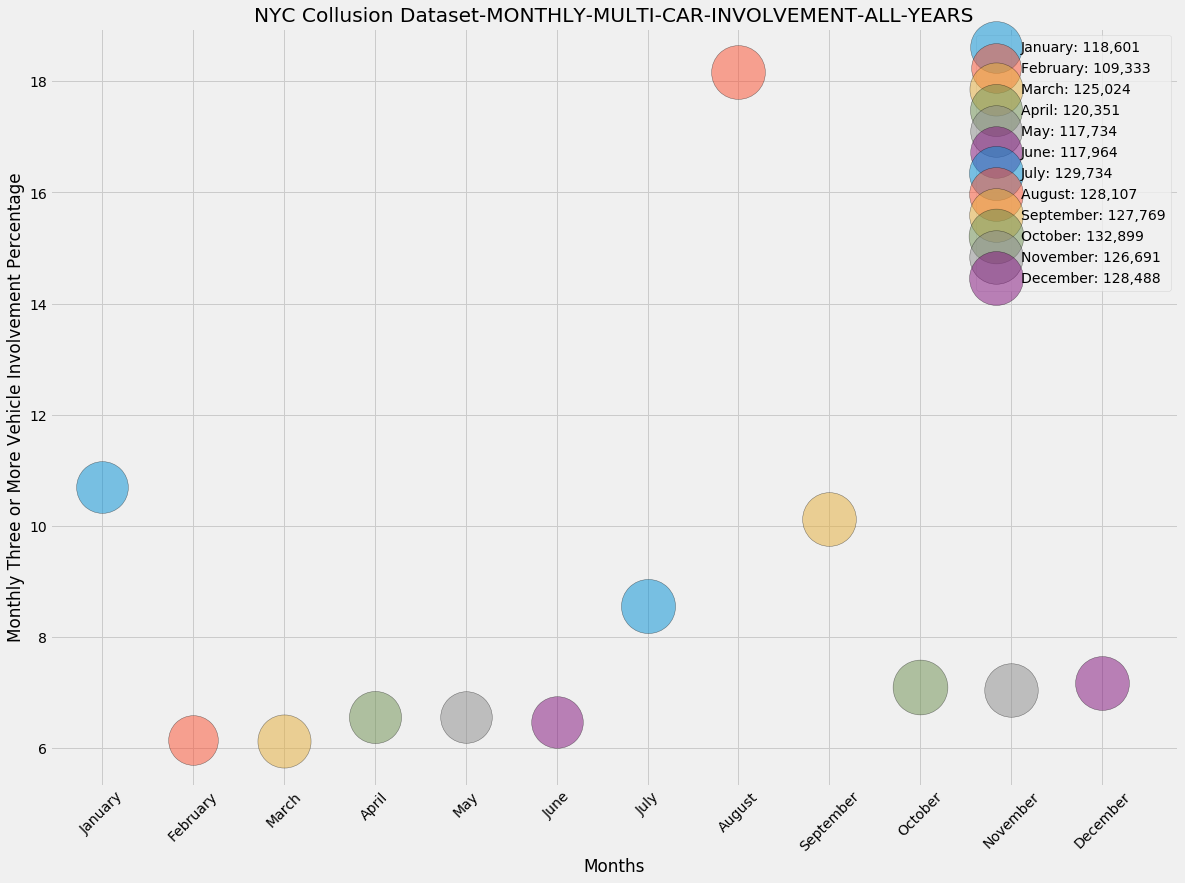

In [81]:
def bubbleSeriesMultiCarInv(multiCarInvPerc_df=fin4lPerctgDataFramer()):
    """
    CREATES A BUBBLE CHART WITH BUBBLE SIZE PROPORTIONATE TO MONTHLY COLLUSION COUNT
    """
    plt.figure(figsize=(18, 13))
    plt.title('BUBBLE CHART: ZIP CODE VS COLLUSION-PER-SQ-KM-ALL-YEARS')
    plt.title('NYC Collusion Dataset-MONTHLY-MULTI-CAR-INVOLVEMENT-ALL-YEARS')
    plt.ylabel('Monthly Three or More Vehicle Involvement Percentage')
    plt.xlabel('Months')
    perc_list = multiCarInvPerc_df['percMonthly']
    num4size_list = multiCarInvPerc_df['numTotalMonthly']
    m0nthFancy_l1st = monthNamesLister()
    monthFancy_list = [
        month + ': {:,}'.format(numCollusion)
        for month, numCollusion in zip(m0nthFancy_l1st, num4size_list)
    ]

    for month, percentage, numTotal in zip(m0nthFancy_l1st, perc_list,
                                           num4size_list):
        lab3l = str(month)+': {:,}'.format(numTotal)
        plt.scatter(
            month,
            percentage,
            s=3000 * numTotal / num4size_list.max(),
            marker='o',
            edgecolors='black',
            alpha=0.50,
            label=lab3l)
    plt.legend(loc='best')
    fileName2save = 'Q7_MULTI-CAR-COLLUSION-MONTHLY-ALL-YEARS.png'
    plt.savefig(fileName2save)
    plt.xticks(rotation=45)
    plt.show()
    return None

bubbleMultiCarInv()



# Q-7: Do winter driving conditions lead to more multi-car collisions?
# * Calculate the chi-square test statistic for testing whether a
# collision is more likely to involve 3 or more cars in January than in May.